# **Facial Age EDA**
This colab notebook explores the [UTKFace Dataset](https://susanqq.github.io/UTKFace/).

# Imports and Co-Lab Set Up

In [ ]:
from google.colab import drive
import tarfile

from IPython.display import display, Image

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1: Exploring Facial Age Dataset

## Part 1.1: Create Age-Image Dataset
In this section, we will unzip the folder of images from our drive and create a dataset that contains the age and image path. 

In [ ]:
# Unzip the tar gz folder of images from the age dataset
crop_part1 = tarfile.open('/content/drive/Shared drives/CIS545 Final Project/crop_part1.tar.gz')
age_img_paths = crop_part1.getnames()
for i in range(len(age_img_paths)):
  rel_path = age_img_paths[i]
  age_img_paths[i] = '/content/drive/Shared drives/CIS545 Final Project/' + rel_path
crop_part1.close()

In [ ]:
# Display first five paths to see format
age_img_paths[:5]

['/content/drive/Shared drives/CIS545 Final Project/crop_part1/24_1_2_20170104020224692.jpg.chip.jpg',
 '/content/drive/Shared drives/CIS545 Final Project/crop_part1/3_1_3_20161219230106056.jpg.chip.jpg',
 '/content/drive/Shared drives/CIS545 Final Project/crop_part1/35_0_0_20170105162448427.jpg.chip.jpg',
 '/content/drive/Shared drives/CIS545 Final Project/crop_part1/5_0_0_20170110213554657.jpg.chip.jpg',
 '/content/drive/Shared drives/CIS545 Final Project/crop_part1/23_1_4_20170103223615095.jpg.chip.jpg']

In [ ]:
ages = []
# Extracts age from the image path
for name in age_img_paths:
  name = name.split('/')[-1].split('_')[0]
  ages.append(name)

In [ ]:
age_face_df = pd.DataFrame(data = {'Ages' : ages, "Image Path": age_img_paths})
age_face_df

,Ages,Image Path
0,24,/content/drive/Shared drives/CIS545 Final Proj...
1,3,/content/drive/Shared drives/CIS545 Final Proj...
2,35,/content/drive/Shared drives/CIS545 Final Proj...
3,5,/content/drive/Shared drives/CIS545 Final Proj...
4,23,/content/drive/Shared drives/CIS545 Final Proj...
...,...,...
9776,49,/content/drive/Shared drives/CIS545 Final Proj...
9777,25,/content/drive/Shared drives/CIS545 Final Proj...
9778,1,/content/drive/Shared drives/CIS545 Final Proj...
9779,6,/content/drive/Shared drives/CIS545 Final Proj...


In [ ]:
age_face_df.dtypesd

Ages          object
Image Path    object
dtype: object

Now, we want to convert the datatype of the 'Ages' column to a numeric type and drop any non-numeric values. 

In [ ]:
def to_int(age):
  try:
    return int(age)
  except:
    return None

age_face_df['Ages'] = age_face_df['Ages'].apply(lambda age: to_int(age)).dropna()
age_face_df['Ages']

0       24.0
1        3.0
2       35.0
3        5.0
4       23.0
        ... 
9776    49.0
9777    25.0
9778     1.0
9779     6.0
9780    78.0
Name: Ages, Length: 9781, dtype: float64

In [ ]:
age_face_df.dtypes

Ages          float64
Image Path     object
dtype: object

## Part 1.2: Visualizing the Data

Outputting the first five images along with their ages. 

24


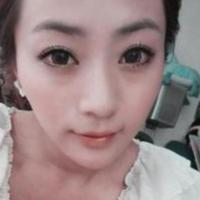

3


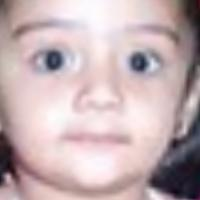

35


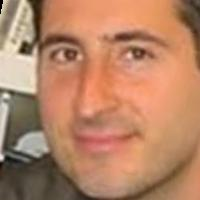

5


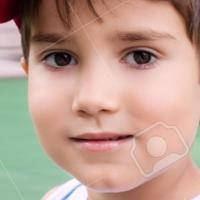

23


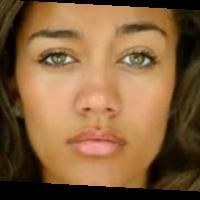

In [ ]:
for i in range(0,5):
  print(ages[i])
  img = Image(age_img_paths[i])
  display(img)

Checking the distribution of ages by decade. 

In [ ]:
import numpy as np

# Grouping the dataset by decade of age 
decade_df = age_face_df.sort_values('Ages')
bins = np.arange(0, 100, 10)
ind = np.digitize(decade_df['Ages'], bins)

decade_df.groupby(ind)


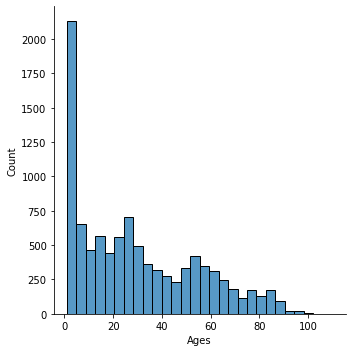

In [ ]:
sns.displot(decade_df['Ages'])
plt.show()